In [79]:
#Importing libraries
#Basic libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

A Brief Introduction:

To begin, we perform an EDA on the entire dataset to understand the distribution and relationships between the variables. This will give us a sense of which variables may be most important for segmentation and which may need to be transformed or cleaned.

To preprocess the dataset, we first remove any duplicate rows or columns and then encode any categorical variables using one-hot encoding to convert them into numerical form, which is required for most machine learning models.

Next, we compute the RFM scores for each customer by calculating the recency, frequency, and monetary value of their orders. These scores can then be used as features in your clustering model.

To perform market segmentation, we use a variety of clustering techniques such as K-means, Hierarchical clustering, and DBSCAN. One can use these methods to identify the proper number of clusters and evaluate different options.

Once we have identified the clusters, we describe the properties of each cluster in terms of the RFM scores and any other relevant variables and also describe the properties of the customers belonging to each cluster to better understand their characteristics and needs.

In [80]:
#Load all the data
cs_df = pd.read_csv('customer_segmentation.csv')

### Here we take a look at the data structure

In [81]:
cs_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_type,payment_installments,...,seller_id,shipping_limit_date,price,freight_value,seller_city,seller_state,product_category_name,product_name_lenght,product_description_lenght,product_category_name_english
0,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,boleto,1,...,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.7,22.76,belo horizonte,SP,perfumaria,29,178,perfumery
1,86674ccaee19790309333210917b2c7d,1b338293f35549b5e480b9a3d7bbf3cd,delivered,2018-08-09 11:37:35,2018-08-09 14:35:19,2018-08-10 14:34:00,2018-08-14 18:51:47,2018-08-22 00:00:00,credit_card,5,...,289cdb325fb7e7f891c38608bf9e0962,2018-08-13 14:31:29,116.9,18.92,belo horizonte,SP,perfumaria,29,178,perfumery
2,aee682982e18eb4714ce9f97b15af5e2,8858442ea4d5dc5bb9e118e8f728095d,delivered,2018-07-09 18:46:28,2018-07-11 03:45:45,2018-07-11 15:01:00,2018-07-12 18:14:35,2018-07-18 00:00:00,boleto,1,...,289cdb325fb7e7f891c38608bf9e0962,2018-07-13 03:45:45,118.7,9.34,belo horizonte,SP,perfumaria,29,178,perfumery
3,d543201a9b42a1402ff97e65b439a48b,971bf8f42a9f8cb3ead257854905b454,delivered,2018-08-21 10:00:25,2018-08-21 10:50:54,2018-08-22 15:21:00,2018-08-28 18:58:22,2018-09-10 00:00:00,credit_card,2,...,289cdb325fb7e7f891c38608bf9e0962,2018-08-23 10:50:54,116.9,22.75,belo horizonte,SP,perfumaria,29,178,perfumery
4,d543201a9b42a1402ff97e65b439a48b,971bf8f42a9f8cb3ead257854905b454,delivered,2018-08-21 10:00:25,2018-08-21 10:50:54,2018-08-22 15:21:00,2018-08-28 18:58:22,2018-09-10 00:00:00,credit_card,2,...,289cdb325fb7e7f891c38608bf9e0962,2018-08-23 10:50:54,116.9,22.75,belo horizonte,SP,perfumaria,29,178,perfumery


In [82]:
cs_df.corr()

,payment_installments,payment_value,order_item_id,price,freight_value,product_name_lenght,product_description_lenght
payment_installments,1.000000,0.309472,0.071594,0.295054,0.205758,-0.006959,0.032461
payment_value,0.309472,1.000000,0.230238,0.763896,0.382981,-0.003285,0.165994
order_item_id,0.071594,0.230238,1.000000,-0.069742,-0.049857,-0.018701,-0.027602
price,0.295054,0.763896,-0.069742,1.000000,0.415021,0.016533,0.188408
freight_value,0.205758,0.382981,-0.049857,0.415021,1.000000,0.048363,0.121719
product_name_lenght,-0.006959,-0.003285,-0.018701,0.016533,0.048363,1.000000,0.112177
product_description_lenght,0.032461,0.165994,-0.027602,0.188408,0.121719,0.112177,1.000000


In [83]:
#Now we look for info about the data
print("Dataset info:")
display(cs_df.info())
print()
print("Dataset shape:")
display(cs_df.shape)
print()
display(cs_df.describe())

Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13801 entries, 0 to 13800
Data columns (total 26 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   order_id                       13801 non-null  object 
 1   customer_id                    13801 non-null  object 
 2   order_status                   13801 non-null  object 
 3   order_purchase_timestamp       13801 non-null  object 
 4   order_approved_at              13801 non-null  object 
 5   order_delivered_carrier_date   13801 non-null  object 
 6   order_delivered_customer_date  13801 non-null  object 
 7   order_estimated_delivery_date  13801 non-null  object 
 8   payment_type                   13801 non-null  object 
 9   payment_installments           13801 non-null  int64  
 10  payment_value                  13801 non-null  float64
 11  customer_unique_id             13801 non-null  object 
 12  customer_city                  1

None


Dataset shape:


(13801, 26)

,payment_installments,payment_value,order_item_id,price,freight_value,product_name_lenght,product_description_lenght
count,13801.000000,13801.000000,13801.000000,13801.000000,13801.000000,13801.000000,13801.000000
mean,3.014637,194.349691,1.230491,130.947103,21.938168,49.300703,814.330411
std,2.801721,294.854258,0.737495,210.712421,18.567013,9.759529,648.790194
min,1.000000,0.050000,1.000000,0.850000,0.000000,8.000000,4.000000
25%,1.000000,66.750000,1.000000,40.000000,12.870000,43.000000,366.000000
50%,2.000000,120.290000,1.000000,79.000000,18.230000,52.000000,631.000000
75%,4.000000,206.780000,1.000000,139.000000,23.310000,57.000000,1030.000000
max,20.000000,7274.880000,13.000000,4590.000000,375.280000,69.000000,3985.000000


In [84]:
#Find what percentage of data is empty in each column
round((cs_df.isnull().sum()/ len(cs_df)*100),2)
#We can see there are no empty columns (hence there are no missing values)

order_id                         0.0
customer_id                      0.0
order_status                     0.0
order_purchase_timestamp         0.0
order_approved_at                0.0
order_delivered_carrier_date     0.0
order_delivered_customer_date    0.0
order_estimated_delivery_date    0.0
payment_type                     0.0
payment_installments             0.0
payment_value                    0.0
customer_unique_id               0.0
customer_city                    0.0
customer_state                   0.0
order_item_id                    0.0
product_id                       0.0
seller_id                        0.0
shipping_limit_date              0.0
price                            0.0
freight_value                    0.0
seller_city                      0.0
seller_state                     0.0
product_category_name            0.0
product_name_lenght              0.0
product_description_lenght       0.0
product_category_name_english    0.0
dtype: float64

<AxesSubplot:>

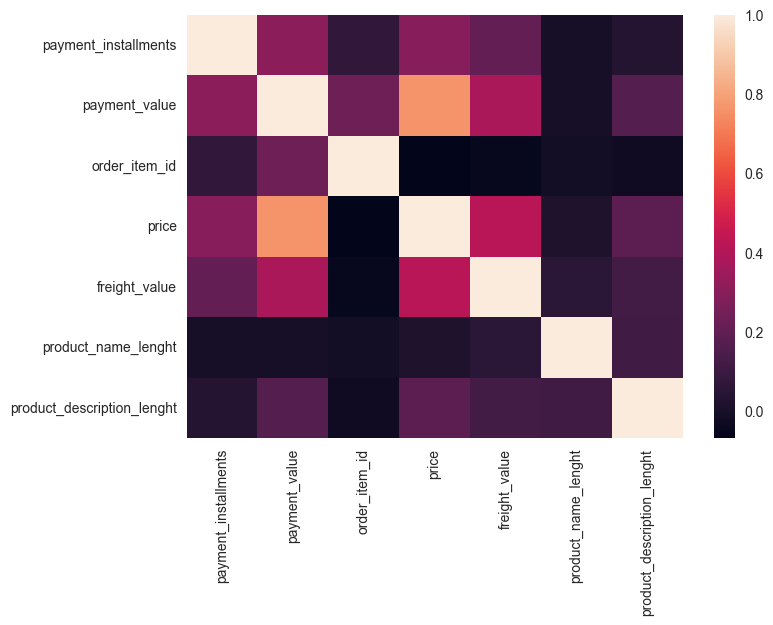

In [85]:
#heatmap of the correlation 
sns.heatmap(cs_df.corr())

In [86]:
#Check for duplicates
print('Data duplicates: ',cs_df.duplicated().sum())

#Get rid of the duplicates
cs_df=cs_df.drop_duplicates()

Data duplicates:  83


In [87]:
#Check for duplicates again
print('Data duplicates: ',cs_df.duplicated().sum()) #we now know that cs_df is our dataframe but w/o duplicates

Data duplicates:  0


In [88]:
#Now we need to Change the data type in the date columns so that it matches the data type
date_columns = ['order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date',
             'order_estimated_delivery_date', 'shipping_limit_date'] 

for col in date_columns:
    cs_df[col] = pd.to_datetime(cs_df[col], format='%Y-%m-%d %H:%M:%S')

In [89]:
#create a column month_order for data exploration
cs_df['Month_order'] = cs_df['order_purchase_timestamp'].dt.to_period('M').astype('str')
print(cs_df['Month_order'])

0        2018-07
1        2018-08
2        2018-07
3        2018-08
4        2018-08
          ...   
13796    2018-07
13797    2018-05
13798    2018-04
13799    2018-07
13800    2018-08
Name: Month_order, Length: 13718, dtype: object


In [90]:
print('Min : {}, Max : {}'.format(min(cs_df.Month_order), max(cs_df.Month_order)))

Min : 2017-05, Max : 2018-08


In [91]:
print('Min : {}, Max : {}'.format(min(cs_df.order_purchase_timestamp), max(cs_df.order_purchase_timestamp)))

Min : 2017-05-04 19:35:21, Max : 2018-08-29 14:52:00


In [92]:
#Splitting data based on its datatype
only_numeric = cs_df.select_dtypes(include=['int', 'float'])
only_object = cs_df.select_dtypes(include=['object'])
only_time = cs_df.select_dtypes(include=['datetime', 'timedelta'])




### Data Exploration (we get insight that could be useful to the company)

delivered     13414
shipped         153
canceled         86
invoiced         54
processing       11
Name: order_status, dtype: int64

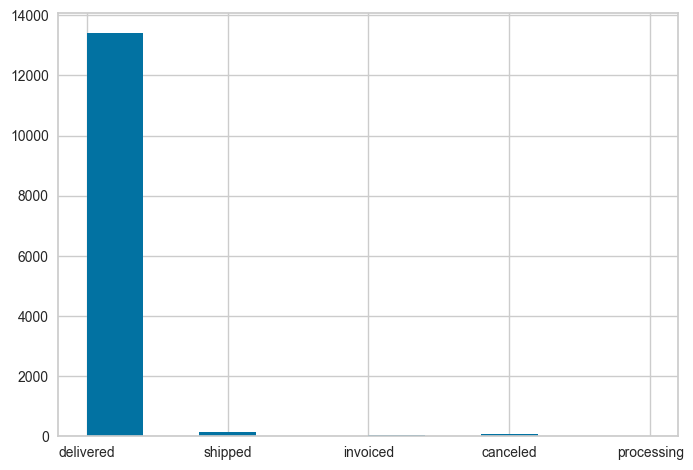

credit_card    10320
boleto          2515
voucher          515
debit_card       368
Name: payment_type, dtype: int64

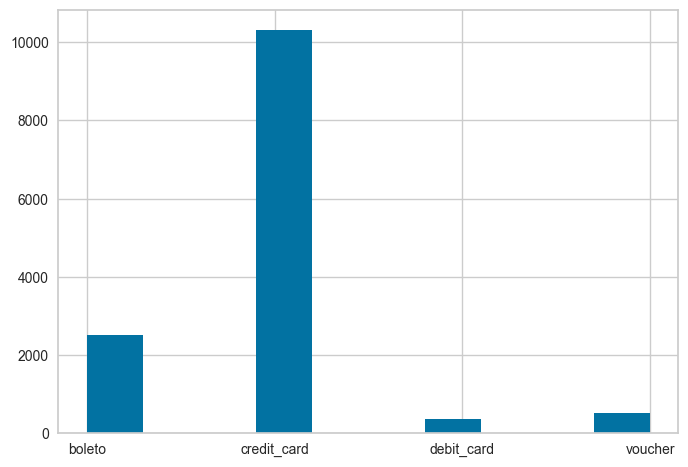

In [93]:
#We display a few of the variables with an outcome that is not confusing
display(pd.value_counts(cs_df['order_status']))
_ = plt.hist(cs_df['order_status']) 
plt.show()

display(pd.value_counts(cs_df['payment_type']))
_ = plt.hist(cs_df['payment_type']) 
plt.show()

[Text(0, 0, 'BA'),
 Text(1, 0, 'SP'),
 Text(2, 0, 'MG'),
 Text(3, 0, 'SC'),
 Text(4, 0, 'PR'),
 Text(5, 0, 'RJ'),
 Text(6, 0, 'RS'),
 Text(7, 0, 'RN'),
 Text(8, 0, 'GO'),
 Text(9, 0, 'MT'),
 Text(10, 0, 'MS'),
 Text(11, 0, 'PE'),
 Text(12, 0, 'CE'),
 Text(13, 0, 'PA'),
 Text(14, 0, 'ES'),
 Text(15, 0, 'DF'),
 Text(16, 0, 'RR'),
 Text(17, 0, 'RO'),
 Text(18, 0, 'MA'),
 Text(19, 0, 'AL'),
 Text(20, 0, 'TO'),
 Text(21, 0, 'PI'),
 Text(22, 0, 'PB'),
 Text(23, 0, 'AM'),
 Text(24, 0, 'AP'),
 Text(25, 0, 'SE'),
 Text(26, 0, 'AC')]

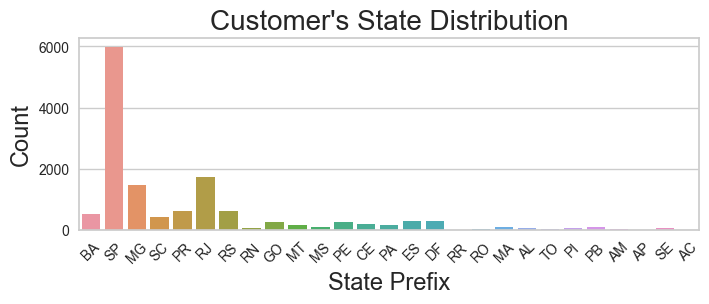

In [94]:
plt.subplot(212)
g = sns.countplot(x='customer_state', data=cs_df, orient='h')
g.set_title("Customer's State Distribution", fontsize=20)
g.set_xlabel("State Prefix", fontsize=17)
g.set_ylabel("Count", fontsize=17)
g.set_xticklabels(g.get_xticklabels(),rotation=45)

As we can see the most orders are placed in SP, which i assume is Sao Pauolo

[Text(0, 0, 'SP'),
 Text(1, 0, 'RJ'),
 Text(2, 0, 'DF'),
 Text(3, 0, 'MG'),
 Text(4, 0, 'PR'),
 Text(5, 0, 'SC'),
 Text(6, 0, 'RS'),
 Text(7, 0, 'MT'),
 Text(8, 0, 'GO'),
 Text(9, 0, 'MA'),
 Text(10, 0, 'CE'),
 Text(11, 0, 'PB'),
 Text(12, 0, 'PE'),
 Text(13, 0, 'BA'),
 Text(14, 0, 'ES'),
 Text(15, 0, 'PI'),
 Text(16, 0, 'MS'),
 Text(17, 0, 'RN')]

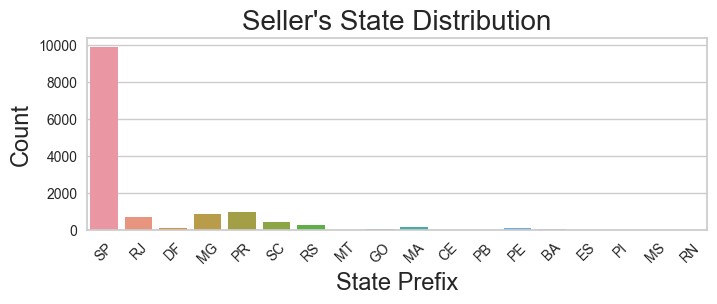

In [95]:
plt.subplot(212)
g = sns.countplot(x='seller_state', data=cs_df, orient='h')
g.set_title("Seller's State Distribution", fontsize=20)
g.set_xlabel("State Prefix", fontsize=17)
g.set_ylabel("Count", fontsize=17)
g.set_xticklabels(g.get_xticklabels(),rotation=45)

In [96]:
cs_df['ord_new'] = cs_df['order_item_id'].copy()

cs_df.loc[cs_df['order_item_id'].isin([7,8,9,10]), 'ord_new'] = '7 to 10'
cs_df.loc[(cs_df['order_item_id'] > 10), 'ord_new'] = '10 and >'

Text(0, 0.5, 'Count')

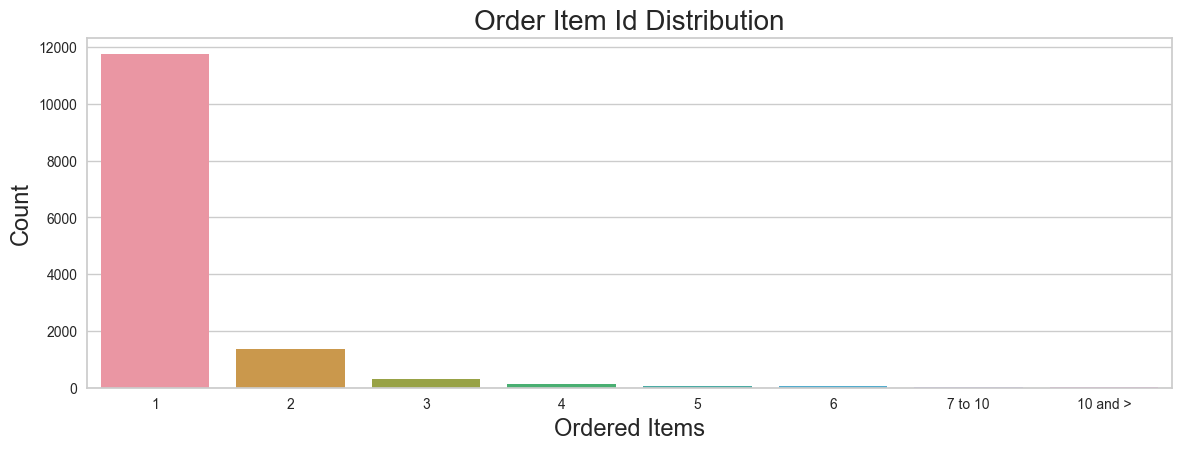

In [97]:
plt.figure(figsize=(14,10))


plt.subplot(211)
g = sns.countplot(x='ord_new', data=cs_df)
g.set_title("Order Item Id Distribution", fontsize=20)
g.set_xlabel("Ordered Items", fontsize=17)
g.set_ylabel("Count", fontsize=17)

As you can see most customers only ordered one item (this is typical in E-commerce)

Text(0, 0.5, 'Product category')

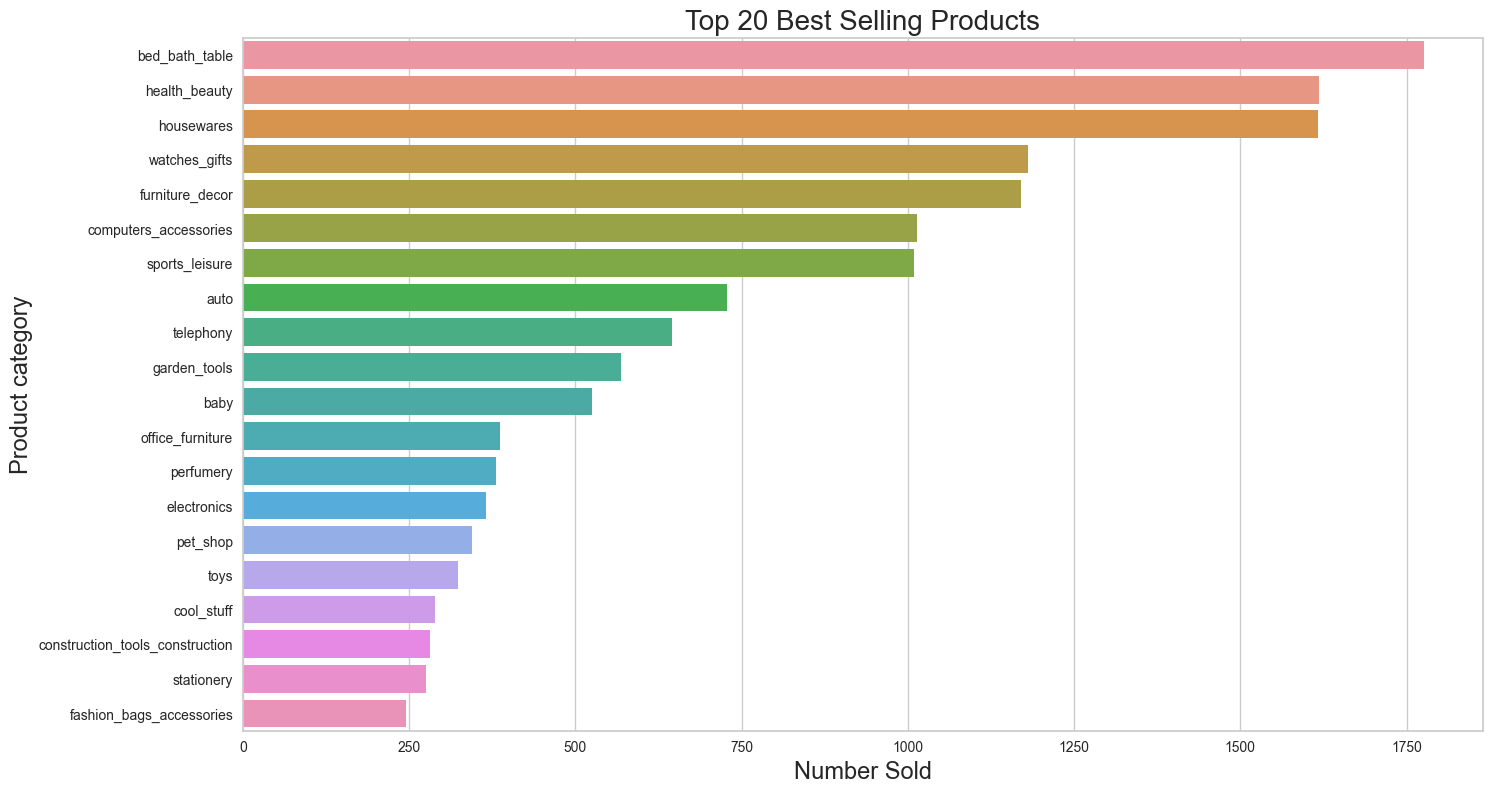

In [98]:
top_20_product_best_seller = cs_df['order_item_id'].groupby(cs_df['product_category_name_english']).sum().sort_values(ascending=False)[:20]



fig=plt.figure(figsize=(16,9))
sns.barplot(y=top_20_product_best_seller.index,x=top_20_product_best_seller.values)
plt.title('Top 20 Best Selling Products',fontsize=20)
plt.xlabel('Number Sold',fontsize=17)
plt.ylabel('Product category',fontsize=17)

Text(0, 0.5, 'City')

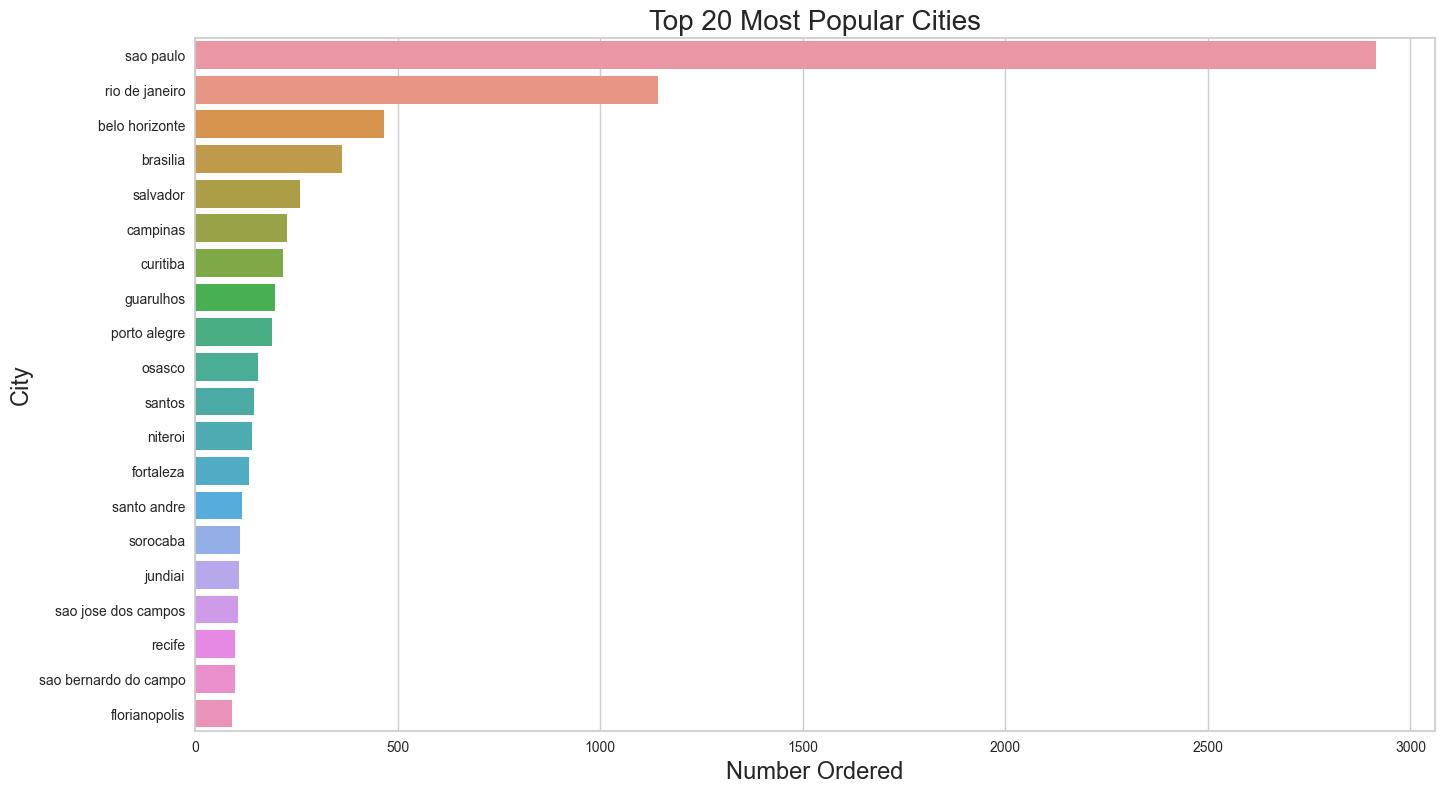

In [99]:
top_20_most_shopped_cities = cs_df['order_item_id'].groupby(cs_df['customer_city']).sum().sort_values(ascending=False)[:20]



fig=plt.figure(figsize=(16,9))
sns.barplot(y=top_20_most_shopped_cities.index,x=top_20_most_shopped_cities.values)
plt.title('Top 20 Most Popular Cities',fontsize=20)
plt.xlabel('Number Ordered',fontsize=17)
plt.ylabel('City',fontsize=17)

Text(0, 0.5, 'Customer ID')

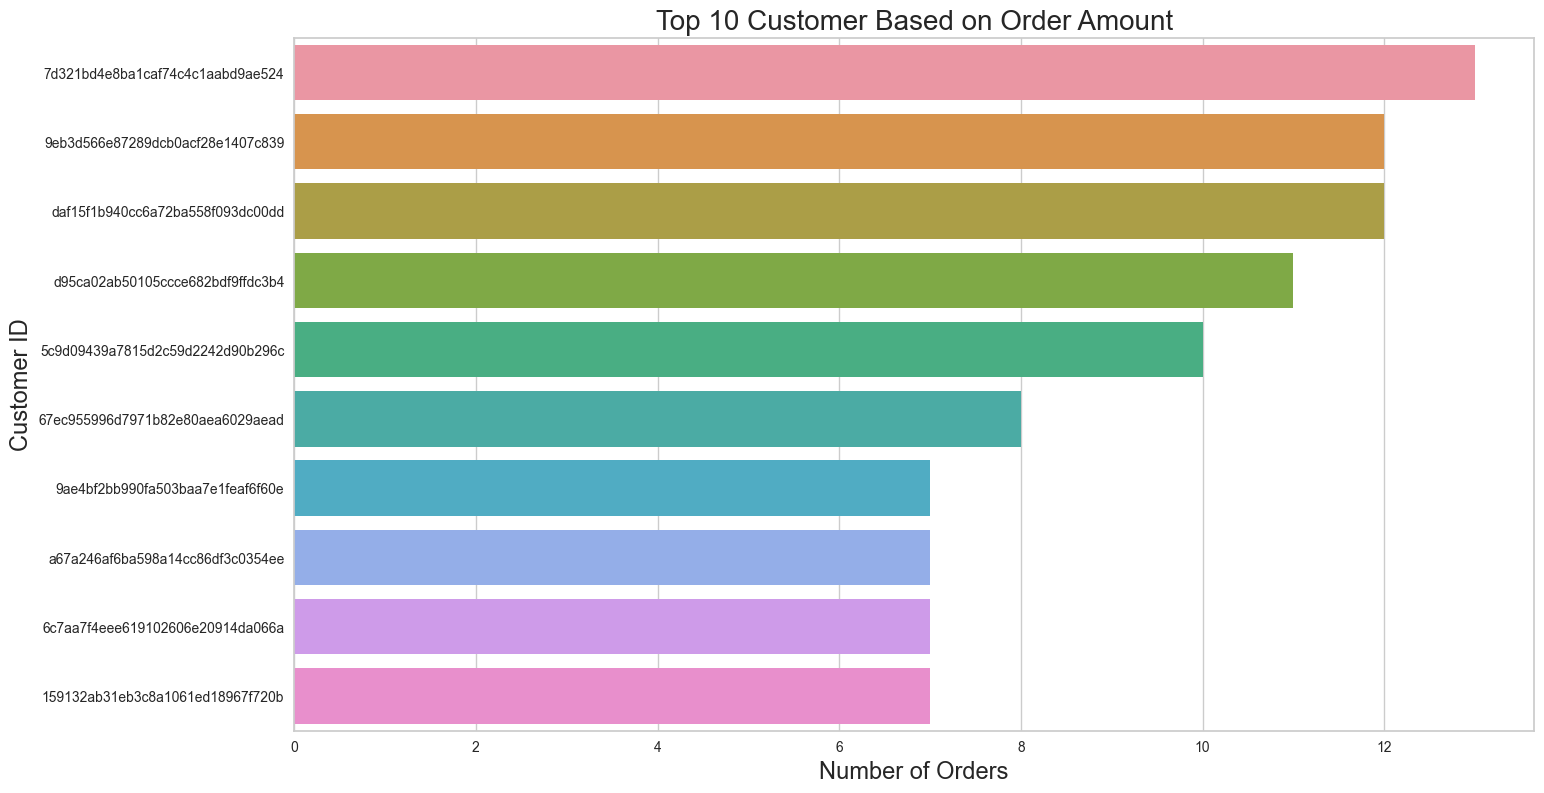

In [100]:
#the 10 customers who ordered the most
top_10_customer_shopping = cs_df['order_item_id'].groupby(cs_df['customer_id']).count().sort_values(ascending=False)[:10]


fig=plt.figure(figsize=(16,9))
sns.barplot(y=top_10_customer_shopping.index,x=top_10_customer_shopping.values)
plt.title('Top 10 Customer Based on Order Amount',fontsize=20)
plt.xlabel('Number of Orders',fontsize=17)
plt.ylabel('Customer ID',fontsize=17)

Text(0, 0.5, 'Customer ID')

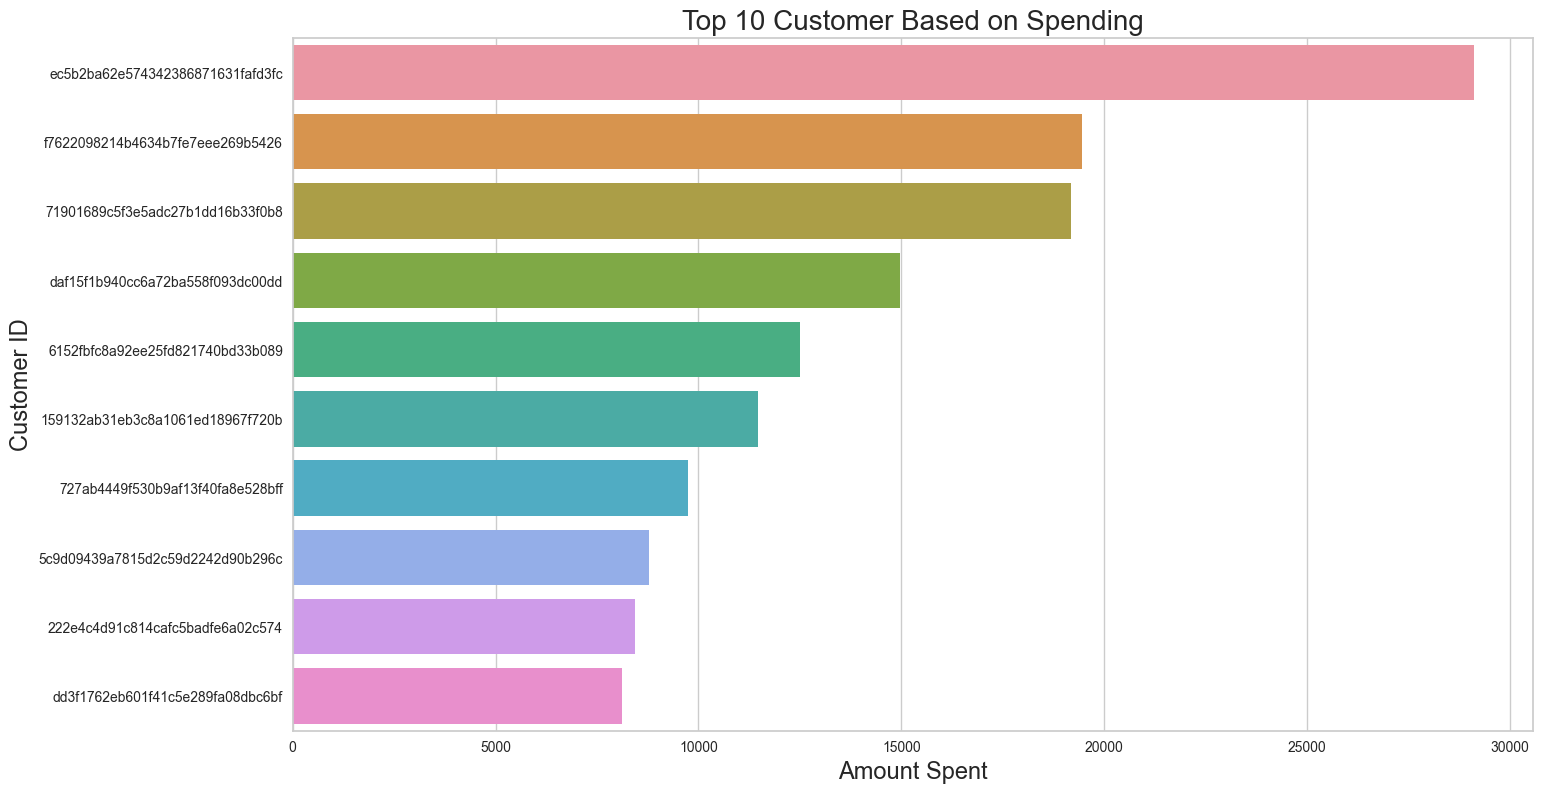

In [101]:
#the 10 most spending customers
top_10_customer_shopping = cs_df['payment_value'].groupby(cs_df['customer_id']).sum().sort_values(ascending=False)[:10]


fig=plt.figure(figsize=(16,9))
sns.barplot(y=top_10_customer_shopping.index,x=top_10_customer_shopping.values)
plt.title('Top 10 Customer Based on Spending',fontsize=20)
plt.xlabel('Amount Spent',fontsize=17)
plt.ylabel('Customer ID',fontsize=17)

In [102]:
#Distribution of customer order status
round(cs_df.order_status.value_counts() / len(cs_df),2)

delivered     0.98
shipped       0.01
canceled      0.01
invoiced      0.00
processing    0.00
Name: order_status, dtype: float64

In [103]:
cs_df['order_process_time'] = cs_df['order_delivered_customer_date'] - cs_df['order_purchase_timestamp']

Text(0, 0.5, 'Product Category')

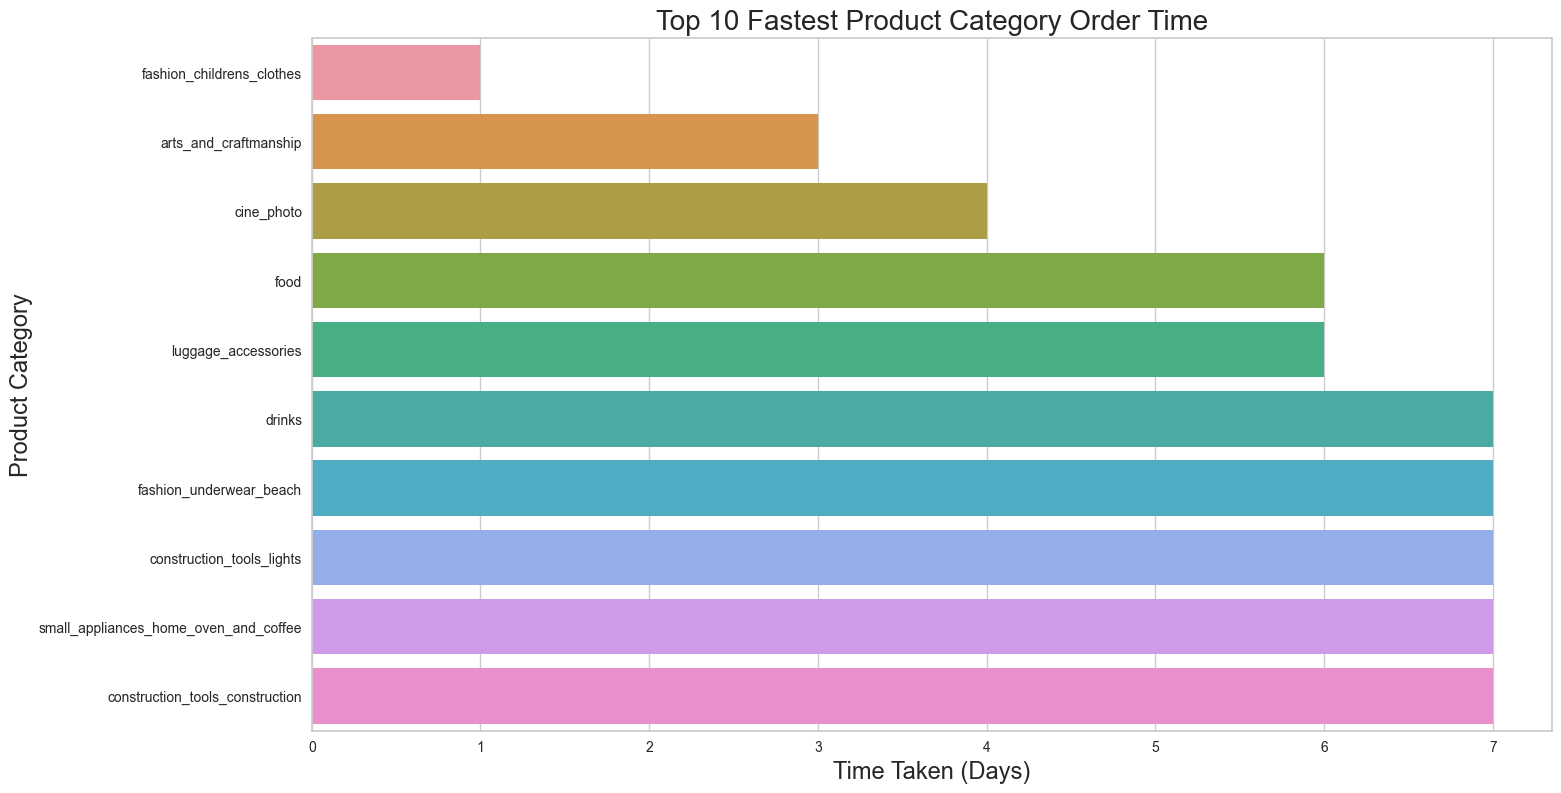

In [104]:
#10 product categories with the fastest time from order to customer acceptance
order_time_by_category = pd.DataFrame(cs_df['order_process_time'].groupby(cs_df['product_category_name_english']).median(numeric_only=False).sort_values(ascending=True)[:10])


fig=plt.figure(figsize=(16,9))
sns.barplot(y=order_time_by_category.index, x=order_time_by_category['order_process_time'].dt.days)
plt.title('Top 10 Fastest Product Category Order Time',fontsize=20)
plt.xlabel('Time Taken (Days)',fontsize=17)
plt.ylabel('Product Category',fontsize=17)

Text(0, 0.5, 'Product Category')

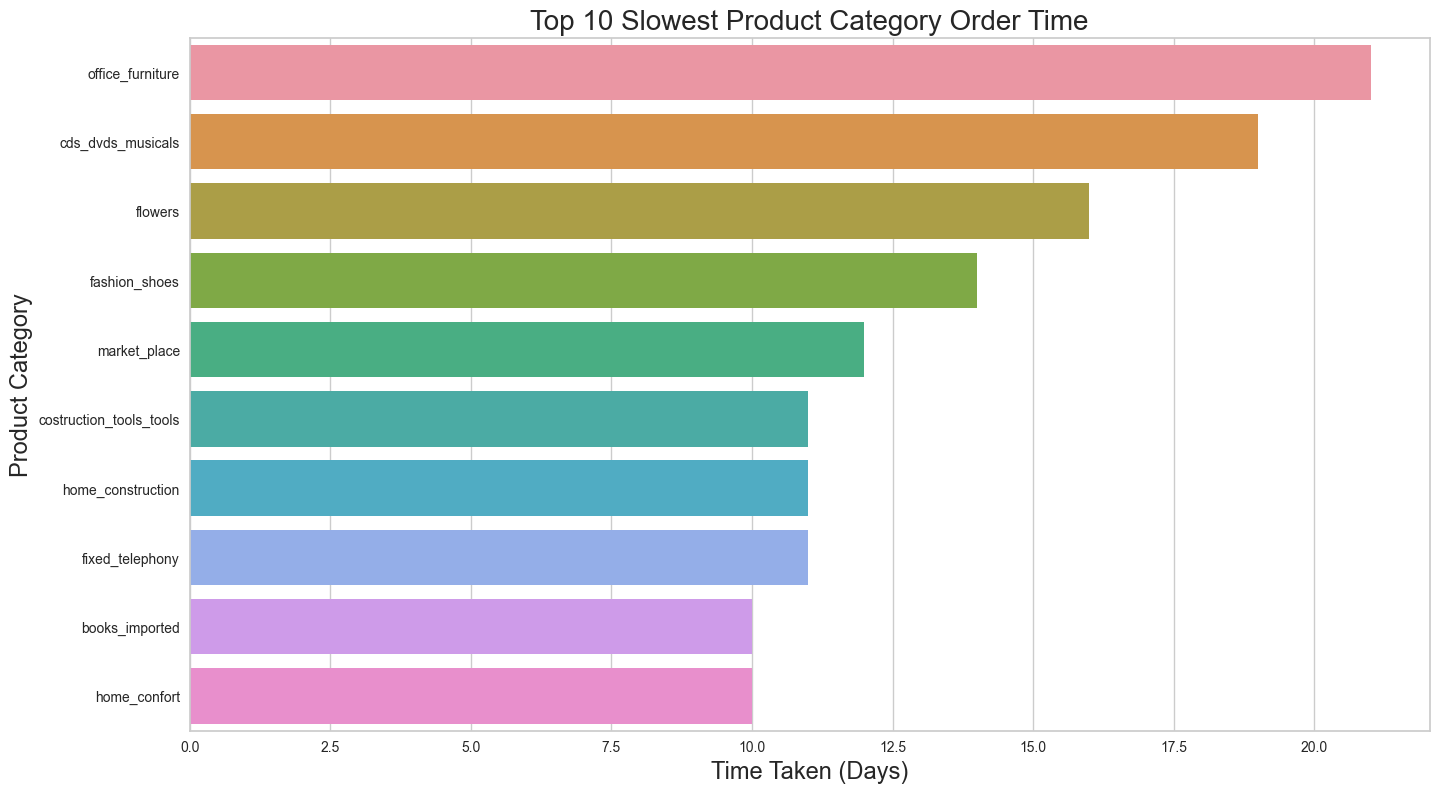

In [105]:
#10 product categories with the longest time from order to customer acceptance
order_time_by_category = pd.DataFrame(cs_df['order_process_time'].groupby(cs_df['product_category_name_english']).median(numeric_only=False).sort_values(ascending=False)[:10])


fig=plt.figure(figsize=(16,9))
sns.barplot(y=order_time_by_category.index, x=order_time_by_category['order_process_time'].dt.days)
plt.title('Top 10 Slowest Product Category Order Time',fontsize=20)
plt.xlabel('Time Taken (Days)',fontsize=17)
plt.ylabel('Product Category',fontsize=17)

Text(0, 0.5, 'Items Ordered')

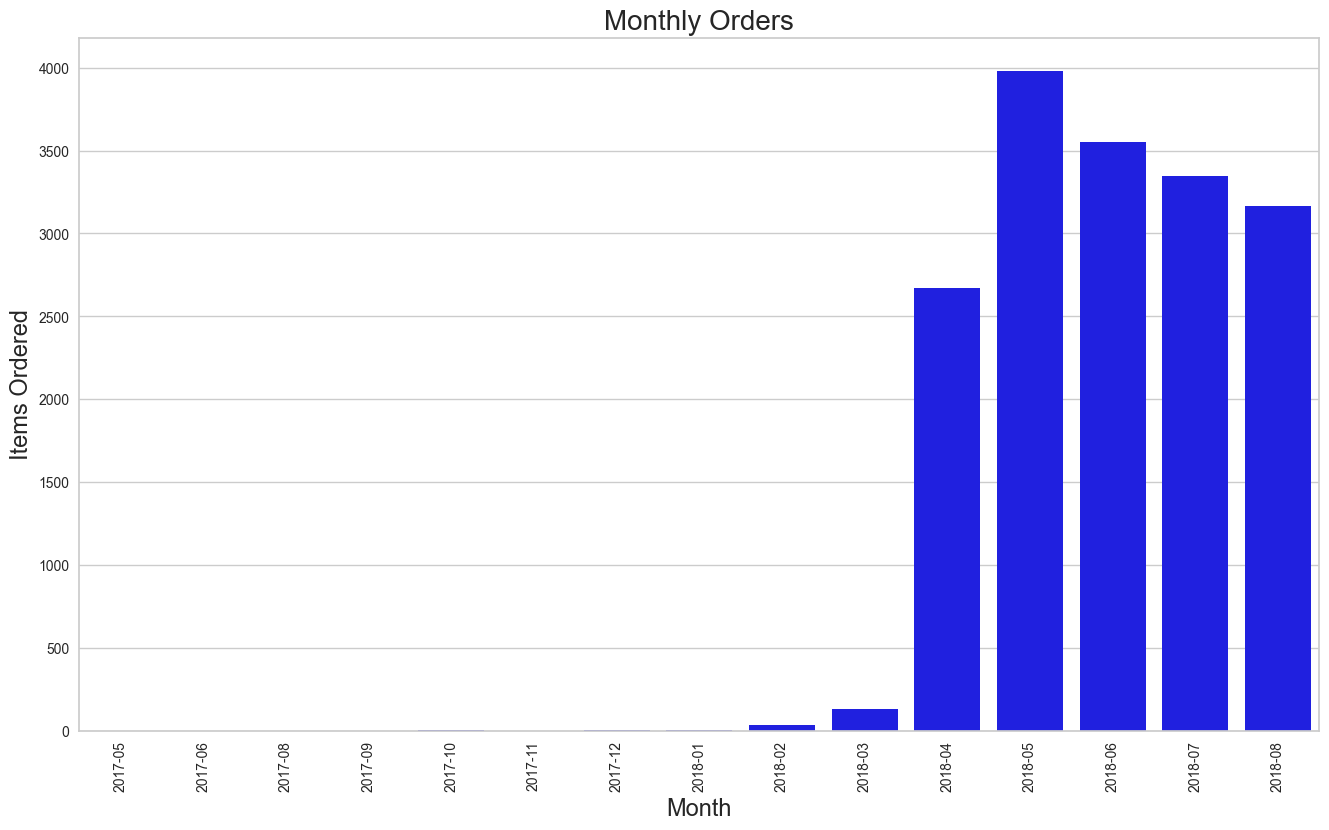

In [106]:
order_count_by_month = cs_df['order_item_id'].groupby(cs_df['Month_order']).sum()


fig=plt.figure(figsize=(16,9))
sns.barplot(y=order_count_by_month.values, x=order_count_by_month.index, color="Blue")
plt.title('Monthly Orders',fontsize=20)
plt.xlabel('Month',fontsize=17)
plt.xticks(rotation=90)
plt.ylabel('Items Ordered',fontsize=17)

Text(0, 0.5, 'Revenue')

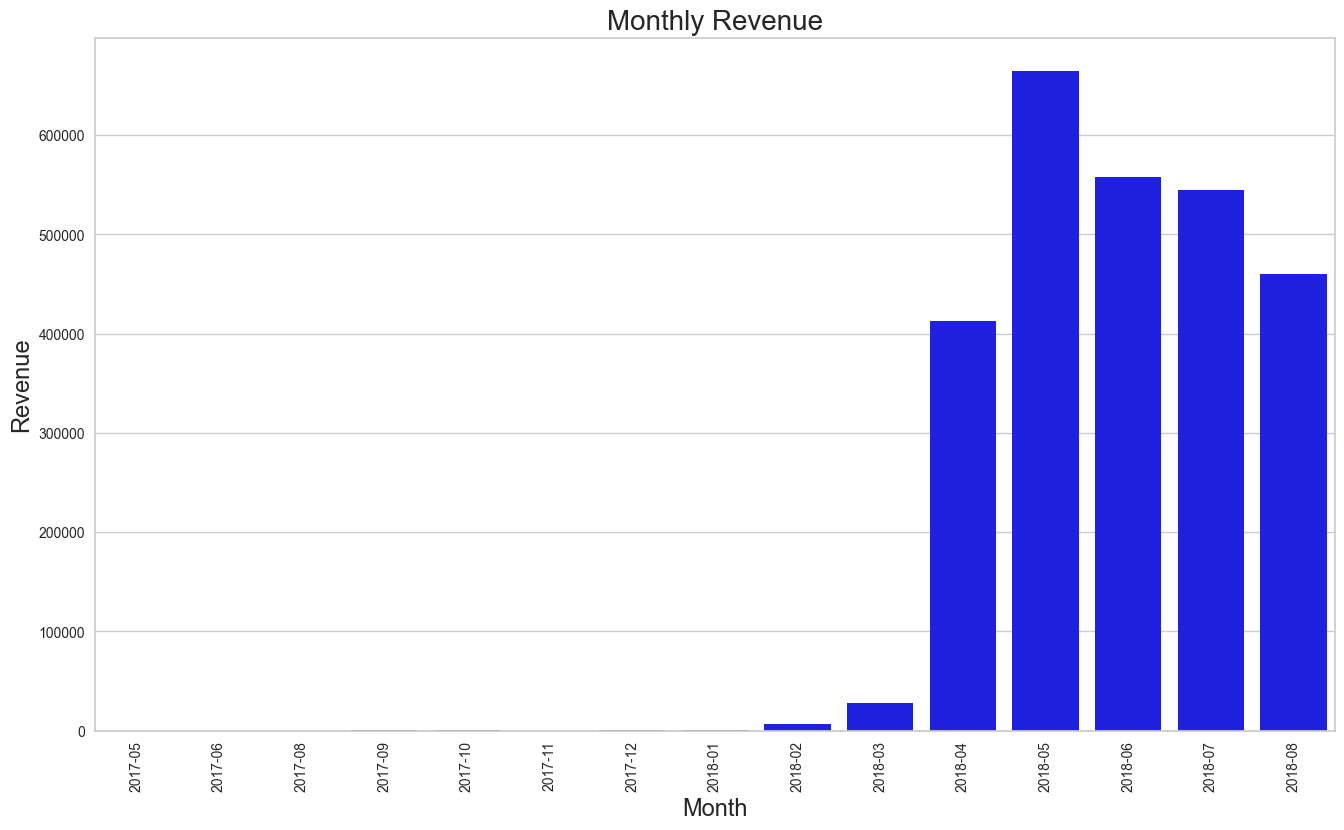

In [107]:
revenue_count_by_month = cs_df['payment_value'].groupby(cs_df['Month_order']).sum()


fig=plt.figure(figsize=(16,9))
sns.barplot(y=revenue_count_by_month.values, x=revenue_count_by_month.index, color="Blue")
plt.title('Monthly Revenue',fontsize=20)
plt.xlabel('Month',fontsize=17)
plt.xticks(rotation=90)
plt.ylabel('Revenue',fontsize=17)

Text(0, 0.5, 'Number of Users')

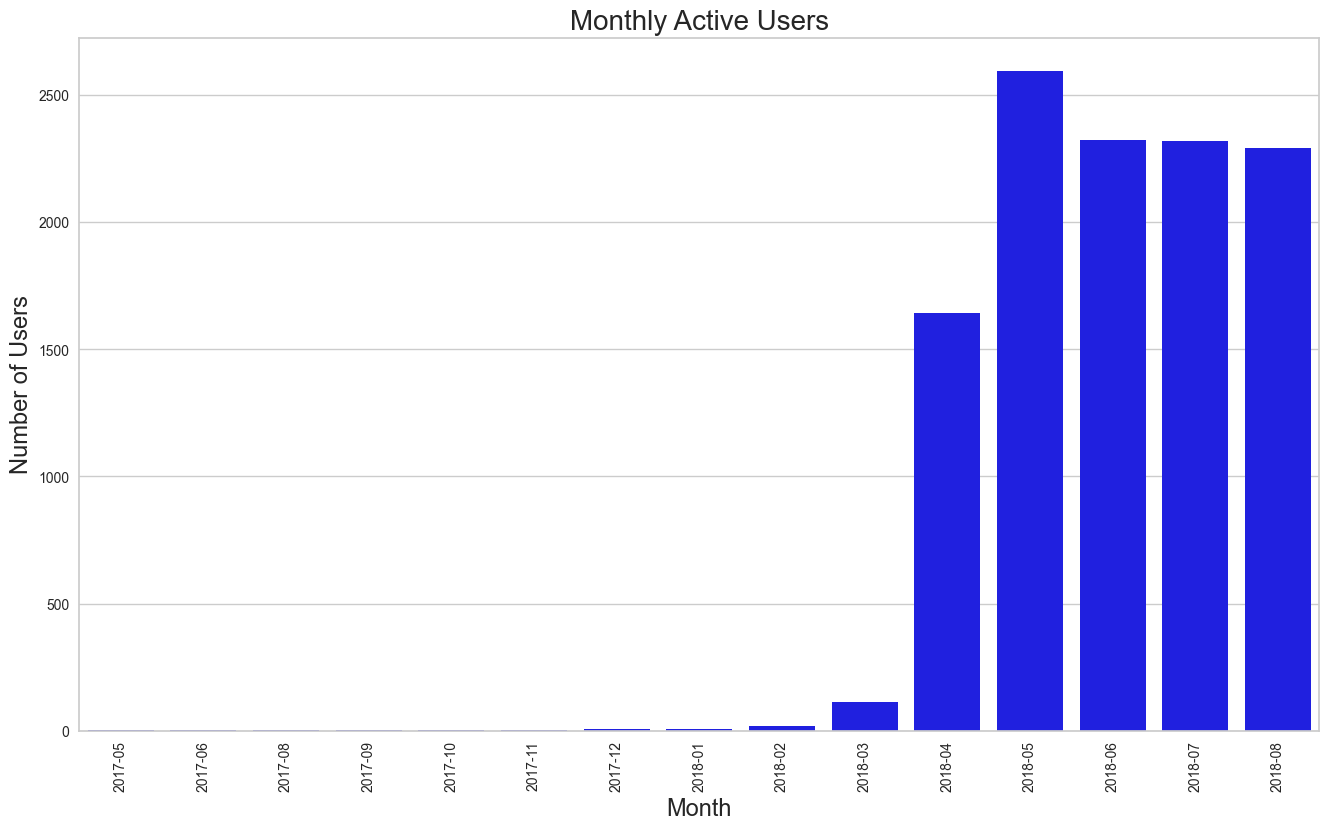

In [108]:
customer_active_by_month = cs_df.groupby('Month_order')['customer_unique_id'].nunique().reset_index()


fig=plt.figure(figsize=(16,9))
sns.barplot(y=customer_active_by_month['customer_unique_id'], x=customer_active_by_month['Month_order'], color="Blue")
plt.title('Monthly Active Users',fontsize=20)
plt.xlabel('Month',fontsize=17)
plt.xticks(rotation=90)
plt.ylabel('Number of Users',fontsize=17)

### Building Our Model

At this stage, modelling will be carried out using a  few clustering algorithm, namely K-Means, hierarchical or DBSCAN, based on RFM (Recency, Frequency, and Monetary) analysis for customer segmentation.

### RFM Analysis

● Recency value: refers to the time since a customer’s last purchase.

● Frequency value: refers to the number of times a customer has made a purchase.

● Monetary value: refers to the total amount a customer has spent purchasing products


In [109]:
#we find the first and last date of purchase
print('Min : {}, Max : {}'.format(min(cs_df.order_purchase_timestamp), max(cs_df.order_purchase_timestamp)))

Min : 2017-05-04 19:35:21, Max : 2018-08-29 14:52:00


In [110]:
#calculate RFM
import datetime as dt
pin_date = max(cs_df.order_purchase_timestamp) + dt.timedelta(1)

#Create RFM dataframe
rfm = cs_df.groupby('customer_unique_id').agg({
    'order_purchase_timestamp' : lambda x: (pin_date - x.max()).days,
    'customer_id' : 'count', 
    'payment_value' : 'sum'})

#Rename columns
rfm.rename(columns = {'order_purchase_timestamp' : 'Recency', 
                      'customer_id' : 'Frequency', 
                      'payment_value' : 'Monetary'}, inplace = True)

rfm.head(20)

,Recency,Frequency,Monetary
customer_unique_id,,,
0000366f3b9a7992bf8c76cfdf3221e2,112,1,141.90
000ec5bff359e1c0ad76a81a45cb598f,9,1,27.75
00172711b30d52eea8b313a7f2cced02,33,1,122.07
001928b561575b2821c92254a2327d06,5,2,329.62
0019e8c501c85848ac0966d45226fa1d,121,1,197.27
001a34eb30ecb8e3aacb07c475ca4dd1,49,1,161.71
001deb796b28a3a128d6113857569aa4,68,1,63.33
002311514717ca8b65b09a26cdf7b91a,64,1,124.32
0025795df7a7d077c4c90162fa820085,37,2,428.16


0.15204054414510537
count    11247.000000
mean         1.219703
std          0.668391
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max         13.000000
Name: Frequency, dtype: float64


<AxesSubplot:xlabel='Frequency', ylabel='Count'>

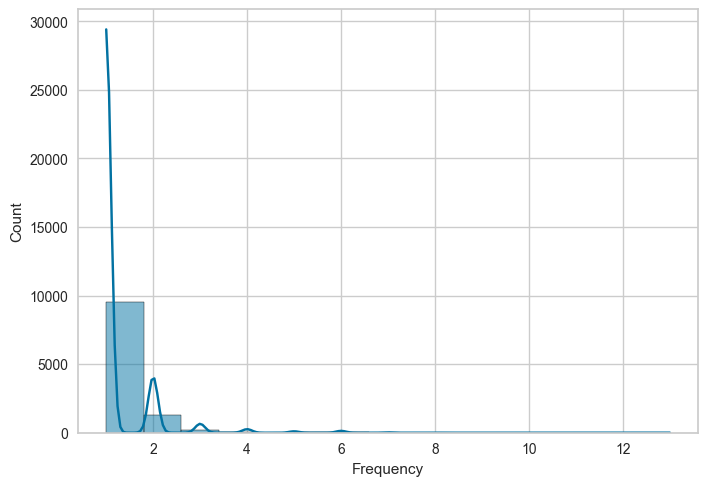

In [111]:

print(rfm[rfm['Frequency']>1].shape[0] / rfm.shape[0])
print(rfm['Frequency'].describe())
sns.histplot(x='Frequency', data=rfm, kde=True)

count    11247.000000
mean       238.087796
std        605.264572
min         10.710000
25%         67.340000
50%        120.220000
75%        215.175000
max      29099.520000
Name: Monetary, dtype: float64


<AxesSubplot:xlabel='Monetary', ylabel='Count'>

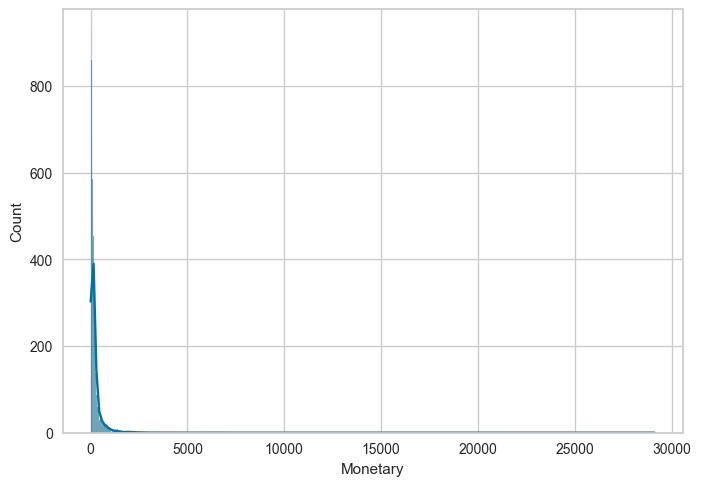

In [112]:
print(rfm['Monetary'].describe())
sns.histplot(x='Monetary', data=rfm, kde=True)

count    11247.000000
mean        73.710589
std         42.652079
min          1.000000
25%         35.000000
50%         73.000000
75%        111.000000
max        482.000000
Name: Recency, dtype: float64


<AxesSubplot:xlabel='Recency', ylabel='Count'>

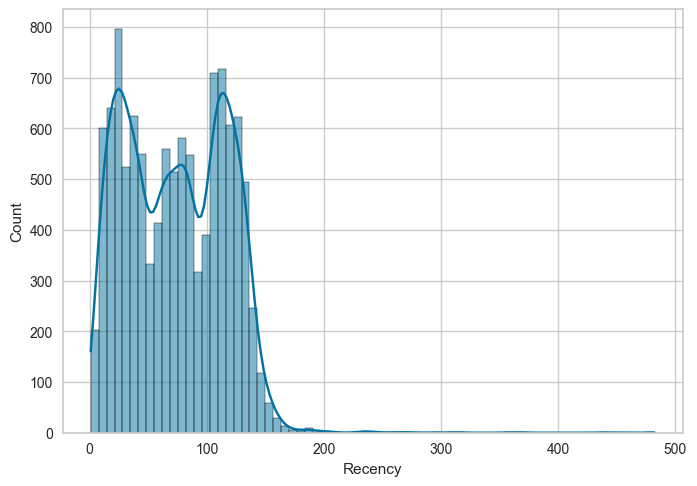

In [113]:
print(rfm['Recency'].describe())
sns.histplot(x='Recency', data=rfm, kde=True)

In [114]:
rfm.describe()

,Recency,Frequency,Monetary
count,11247.000000,11247.000000,11247.000000
mean,73.710589,1.219703,238.087796
std,42.652079,0.668391,605.264572
min,1.000000,1.000000,10.710000
25%,35.000000,1.000000,67.340000
50%,73.000000,1.000000,120.220000
75%,111.000000,1.000000,215.175000
max,482.000000,13.000000,29099.520000


data standardization

In [115]:
import sklearn
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
import seaborn as sns
#import squarify

In [116]:
rfm_scaler = rfm[['Frequency', 'Recency', 'Monetary']]
scaler = MinMaxScaler((0, 1))
model_scaling = scaler.fit_transform(rfm_scaler)
model_df = pd.DataFrame(model_scaling, columns=rfm_scaler.columns)
model_df.head()

,Frequency,Recency,Monetary
0,0.000000,0.230769,0.004510
1,0.000000,0.016632,0.000586
2,0.000000,0.066528,0.003828
3,0.083333,0.008316,0.010963
4,0.000000,0.249480,0.006413


### CODICI GIULIA

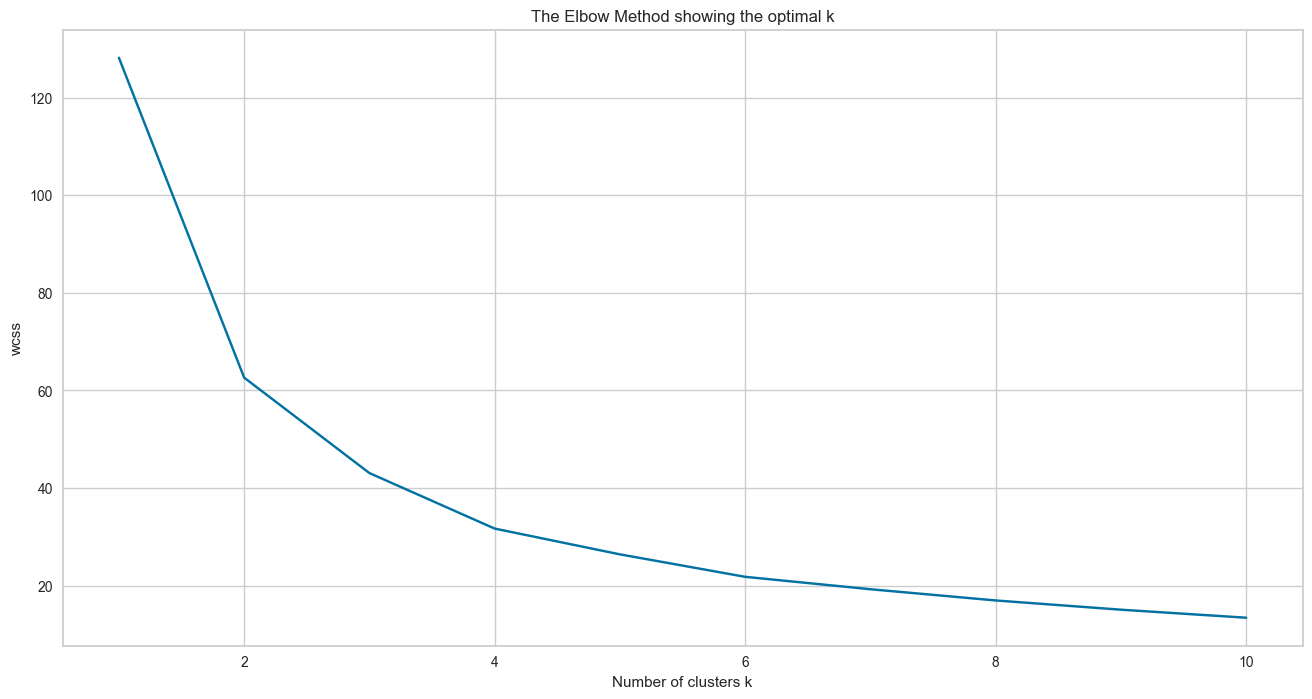

[1 2 2 ... 1 2 1]


,Frequency,Recency,Monetary,Cluster
0,0.000000,0.230769,0.004510,1
1,0.000000,0.016632,0.000586,2
2,0.000000,0.066528,0.003828,2
3,0.083333,0.008316,0.010963,2
4,0.000000,0.249480,0.006413,1
5,0.000000,0.099792,0.005191,2
6,0.000000,0.139293,0.001809,0
7,0.000000,0.130977,0.003906,0
8,0.083333,0.074844,0.014351,2
9,0.000000,0.093555,0.018079,2


In [117]:
wcss=[]
for k in range (1,11):
    kmeans = KMeans (n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(model_df)
    wcss.append(kmeans.inertia_)
    
plt.figure(figsize=(16,8))
plt.plot(range(1,11), wcss, 'bx-')
plt.xlabel('Number of clusters k')
plt.ylabel('wcss')
plt.title('The Elbow Method showing the optimal k')
plt.show()

# Cluster the data using k = 5
kmeans = KMeans(n_clusters = 5, random_state = 42)
# Assigning pseudo labels to the data points and printing them
labels = kmeans.fit(model_df)
cluster_labels = kmeans.labels_
print(cluster_labels)

kmeans.cluster_centers_[:]

#model_df.loc[:, 'customer_unique_id'] = rfm['customer_unique_id']
model_df['Cluster'] = kmeans.labels_
model_df.head(10)

Finding optimal number of clusters

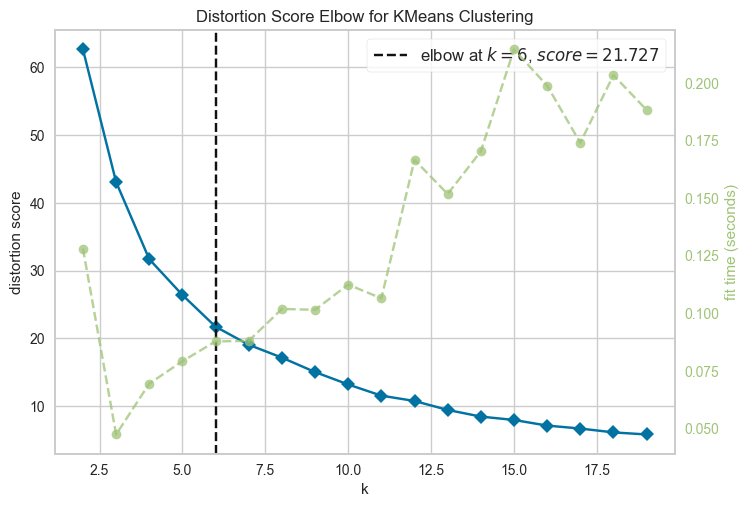

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
kmeans = KMeans()
elbow = KElbowVisualizer(kmeans, k=(2, 20))
elbow.fit(model_df)
elbow.show()

In [ ]:
k_means = KMeans(n_clusters=5, random_state=42).fit(model_df)
segments = k_means.labels_
segments

array([1, 2, 2, ..., 1, 2, 1])

In [ ]:
pd.DataFrame(segments).value_counts()
rfm['segment'] = segments
rfm.head(10)

,Recency,Frequency,Monetary,segment
customer_unique_id,,,,
0000366f3b9a7992bf8c76cfdf3221e2,112,1,141.90,1
000ec5bff359e1c0ad76a81a45cb598f,9,1,27.75,2
00172711b30d52eea8b313a7f2cced02,33,1,122.07,2
001928b561575b2821c92254a2327d06,5,2,329.62,2
0019e8c501c85848ac0966d45226fa1d,121,1,197.27,1
001a34eb30ecb8e3aacb07c475ca4dd1,49,1,161.71,2
001deb796b28a3a128d6113857569aa4,68,1,63.33,0
002311514717ca8b65b09a26cdf7b91a,64,1,124.32,0
0025795df7a7d077c4c90162fa820085,37,2,428.16,2


In [ ]:
final_merge = cs_df[['customer_unique_id',
                        'order_id', 'order_status', 'order_purchase_timestamp', 'payment_type', 'payment_installments',
                        'payment_value']]
final_merge.head()

,customer_unique_id,order_id,order_status,order_purchase_timestamp,payment_type,payment_installments,payment_value
0,af07308b275d755c9edb36a90c618231,53cdb2fc8bc7dce0b6741e2150273451,delivered,2018-07-24 20:41:37,boleto,1,141.46
1,8b8028d453a01986b48c4271cc341475,86674ccaee19790309333210917b2c7d,delivered,2018-08-09 11:37:35,credit_card,5,135.82
2,3edcab192482e9871c17b34cf98c3996,aee682982e18eb4714ce9f97b15af5e2,delivered,2018-07-09 18:46:28,boleto,1,128.04
3,958ac7760e5484df1496ba5833ab6117,d543201a9b42a1402ff97e65b439a48b,delivered,2018-08-21 10:00:25,credit_card,2,279.30
4,958ac7760e5484df1496ba5833ab6117,d543201a9b42a1402ff97e65b439a48b,delivered,2018-08-21 10:00:25,credit_card,2,279.30


In [ ]:
final_df = pd.merge(left=final_merge,
                    right=rfm,
                    on='customer_unique_id',
                    how='inner')
final_df.head(20)

,customer_unique_id,order_id,order_status,order_purchase_timestamp,payment_type,payment_installments,payment_value,Recency,Frequency,Monetary,segment
0,af07308b275d755c9edb36a90c618231,53cdb2fc8bc7dce0b6741e2150273451,delivered,2018-07-24 20:41:37,boleto,1,141.46,36,1,141.46,2
1,8b8028d453a01986b48c4271cc341475,86674ccaee19790309333210917b2c7d,delivered,2018-08-09 11:37:35,credit_card,5,135.82,21,1,135.82,2
2,3edcab192482e9871c17b34cf98c3996,aee682982e18eb4714ce9f97b15af5e2,delivered,2018-07-09 18:46:28,boleto,1,128.04,26,2,254.27,2
3,3edcab192482e9871c17b34cf98c3996,f7f0b79050e7ef0b1cf7ffceb0aa114a,delivered,2018-08-04 14:40:31,boleto,1,126.23,26,2,254.27,2
4,958ac7760e5484df1496ba5833ab6117,d543201a9b42a1402ff97e65b439a48b,delivered,2018-08-21 10:00:25,credit_card,2,279.30,9,2,558.60,2
5,958ac7760e5484df1496ba5833ab6117,d543201a9b42a1402ff97e65b439a48b,delivered,2018-08-21 10:00:25,credit_card,2,279.30,9,2,558.60,2
6,994c4dd88ed8c241e8f5a39b7b1c2295,549d30fc0378a3645167a900c9ece399,delivered,2018-06-12 09:05:48,credit_card,6,141.66,79,1,141.66,0
7,4ee553fa4da24e46926241e4a67812b0,4e16f71b2a5ddc0266f9ddfdfd0bcfba,delivered,2018-07-22 18:58:10,boleto,1,134.63,38,1,134.63,2
8,f5985137de910a1e58ed6bc3214a4100,f4d33a3db484fba77b5f1f1990fb3445,delivered,2018-08-18 22:34:35,credit_card,8,279.30,11,2,558.60,2
9,f5985137de910a1e58ed6bc3214a4100,f4d33a3db484fba77b5f1f1990fb3445,delivered,2018-08-18 22:34:35,credit_card,8,279.30,11,2,558.60,2


In [123]:
rfmStats = final_df.groupby('segment').agg({'payment_installments': ['median', 'min', 'max'],
                                 'payment_value': ['median', 'min', 'max'],
                                 'Monetary': ['median', 'min', 'max', 'count'],
                                 'Frequency': ['median', 'min', 'max', 'count'],
                                 'Recency': ['median', 'min', 'max', 'count']})
rfmStats

payment_installments         payment_value                 Monetary  \
                      median min max        median    min      max   median   
segment                                                                       
0                        2.0   1  20        108.04  16.29  4681.78   108.04   
1                        2.0   1  17        109.42   0.92  3209.72   110.20   
2                        2.0   1  20        110.88   1.40  3184.34   127.04   
3                        1.0   1  18        263.02   0.22  7274.88  1380.55   
4                        2.0   1  16        152.58   0.05  3256.14   327.51   

                               Frequency               Recency                 
           min       max count    median min max count  median min  max count  
segment                                                                        
0        16.29   4681.78  2785       1.0   1   1  2785    73.0  50   97  2785  
1        14.38   3209.72  3411       1.0   1   2  3411   119.0  98  482  3411  
2        10.71   4629.75  4455       1.0   1   3  4455    26.0   1   53  4455  
3        48.65  29099.52   904       5.0   4  13   904    84.0   6  182   904  
4        12.91   6512.28  2163       2.0   2   3  2163    98.0  30  159  2163

Text(0.5, 0.98, 'Treemap: Number of Customers')

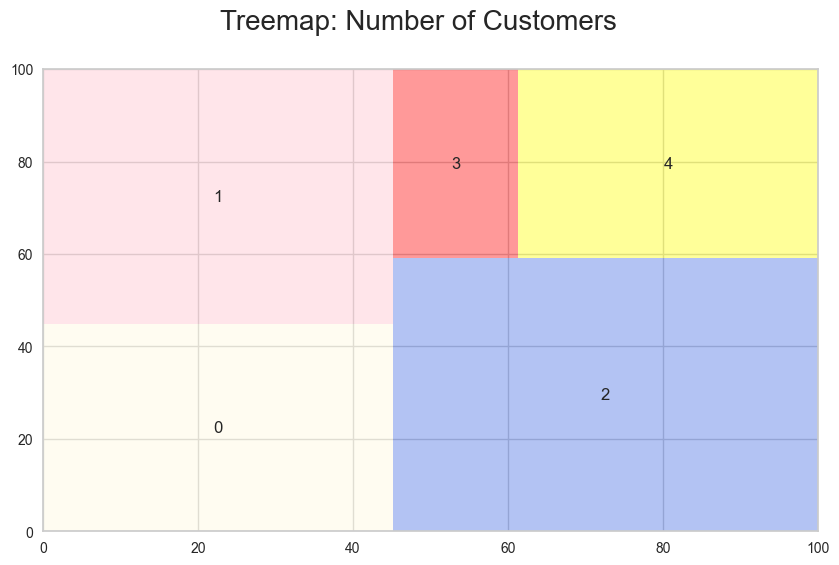

In [120]:
import squarify
plt.figure(figsize=(10, 6))
squarify.plot(sizes=rfmStats["Recency"]["count"], label=rfmStats.index,
              color=["cornsilk", "pink","royalblue", "red", "yellow"], alpha=.4)
plt.suptitle("Treemap: Number of Customers", fontsize=20)

Text(0.5, 0.98, 'Treemap: Number of Customers')

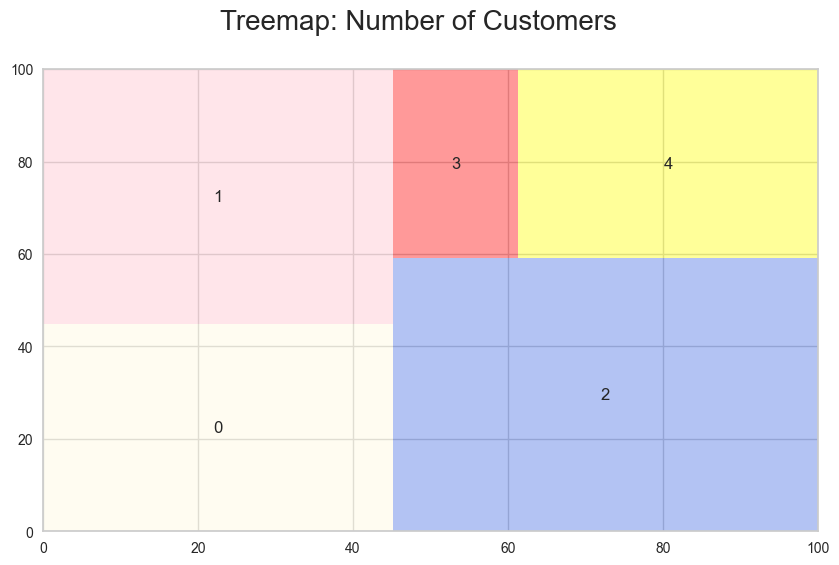

In [124]:
plt.figure(figsize=(10, 6))
squarify.plot(sizes=rfmStats["Frequency"]["count"], label=rfmStats.index,
              color=["cornsilk", "pink","royalblue", "red", "yellow"], alpha=.4)
plt.suptitle("Treemap: Number of Customers", fontsize=20)